In [4]:
from qiskit import*
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *

from qiskit.providers.aer import QasmSimulator


In [6]:
qr = QuantumRegister(5) # quantum bit register
cr = ClassicalRegister(5) # classical bit register
circuit = QuantumCircuit(qr, cr)
# create a quantum circuit containing 5 qubits
# all qubits in superposition (50%:50% chance to be in |0> or |1>) and independent of each other
circuit.h(qr)
circuit.measure(qr, cr)
#circuit.draw(output='mpl', scale=1)

In [8]:
%matplotlib inline

In [13]:
circuit.draw()

┌───┐┌─┐            
q1_0: ┤ H ├┤M├────────────
      ├───┤└╥┘┌─┐         
q1_1: ┤ H ├─╫─┤M├─────────
      ├───┤ ║ └╥┘┌─┐      
q1_2: ┤ H ├─╫──╫─┤M├──────
      ├───┤ ║  ║ └╥┘┌─┐   
q1_3: ┤ H ├─╫──╫──╫─┤M├───
      ├───┤ ║  ║  ║ └╥┘┌─┐
q1_4: ┤ H ├─╫──╫──╫──╫─┤M├
      └───┘ ║  ║  ║  ║ └╥┘
c1: 5/══════╩══╩══╩══╩══╩═
            0  1  2  3  4

In [14]:
from qiskit.tools.visualization import plot_histogram
# let's execute our Quantum Circuit
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend, shots=1024, memory=True).result()
# get all experiments (number of shots)
raw_data = result.get_memory()
print(raw_data)

['00101', '01001', '01110', '00101', '10110', '01100', '10110', '01110', '00011', '10111', '00011', '11101', '10101', '00100', '01110', '11010', '01100', '00011', '11101', '11000', '00011', '11001', '01000', '01101', '10011', '10010', '11110', '00101', '11110', '01111', '01100', '01100', '11101', '10001', '01100', '01001', '10111', '10101', '11000', '10011', '00100', '10000', '01001', '10101', '11011', '11110', '10111', '11110', '01100', '00011', '01010', '00001', '10100', '11100', '10100', '01010', '11101', '00001', '11100', '00000', '10100', '01010', '10111', '11010', '10011', '10001', '00111', '00000', '01001', '00100', '01000', '01110', '10000', '01011', '00010', '10010', '11111', '10101', '01000', '10110', '01101', '01010', '11011', '10011', '10010', '01001', '00011', '11000', '10000', '11101', '11101', '01010', '01100', '00000', '01010', '11110', '01111', '01011', '01111', '01100', '10110', '01000', '11110', '11011', '10011', '10010', '10010', '10011', '01100', '01101', '01101', 

In [16]:
counts = result.get_counts()
print(counts)

{'11101': 28, '01110': 25, '00101': 25, '01001': 33, '10110': 38, '00011': 32, '01100': 39, '10111': 34, '10101': 23, '00100': 33, '11010': 31, '11000': 39, '11001': 33, '01000': 33, '01101': 34, '10011': 27, '10010': 32, '11110': 43, '01111': 33, '10001': 33, '10000': 29, '11011': 35, '01010': 35, '00001': 24, '10100': 31, '11100': 41, '00000': 35, '00111': 33, '01011': 30, '00010': 33, '11111': 26, '00110': 24}


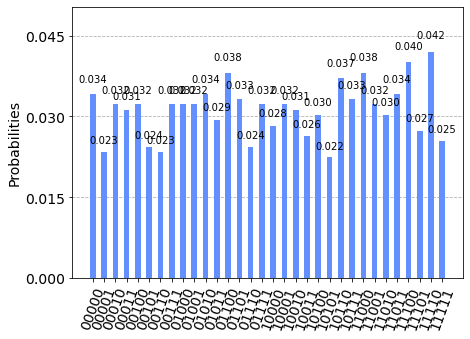

In [17]:
plot_histogram(counts)